# Quality Uncorked


# Goals
* Discover drivers that cause customer to churn
* Use drivers to develop a machine learning model to classify the customer as churn or not. 
* Predict the quality of wine while incorporating unsupervised learning techniques.

## Imports

In [1]:
# importing the necessary libraries to run the code
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt


from wrangle import clean_wine, split_wine


from explore import print_den_v_sug, print_den_v_alc, ph_level, print_den_v_chlo
# from explore import 

# from modeling import 
# from modeling import

import warnings
warnings.filterwarnings("ignore")

## Acquire

* Aquire data from https://data.world/food/wine-quality
* Data size 5,320 rows and 13 columns.
* Each obsevation represent a different wine.
* Each column reperesents a feature or data point fof that wine

## Prepare

* Checked for nulls in the data (there were none)
* Checked that column data types were appropriate
* Encoded categorical variables (the wine type, red or white)
* Split data into train, validate and test (approx. 60/20/20)
* Outliers have not been removed for this iteration of the project

In [2]:
from wrangle import clean_wine, split_wine, acquire_wine

In [3]:
# used my wrangle function that acquires, preps and cleans the data
df = clean_wine()

# splits data train, validate, test
train, validate, test = split_wine()

# Data At a Glance

In [4]:
# display the train data
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
4080,5.1,0.21,0.28,1.4,0.047,48.0,148.0,0.99168,3.50,0.49,10.4,1
3781,7.1,0.29,0.34,7.8,0.036,49.0,128.0,0.99397,3.21,0.40,10.7,1
933,8.6,0.52,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,0
4470,7.0,0.15,0.29,16.4,0.058,45.0,110.0,0.99780,3.15,0.37,9.7,1
1692,6.8,0.27,0.12,1.3,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,1


In [5]:
# display a snapshot of summary statistics
train.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,white
count,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.00000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000
mean,7.209047,0.341178,0.319174,5.016281,0.055332,30.51712,115.498657,0.994491,3.226113,0.533129,10.556381,0.753273
std,1.354698,0.165349,0.144157,4.419279,0.032928,17.85227,56.471119,0.002960,0.164400,0.146775,1.188259,0.431179
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.00000,6.000000,0.987400,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.00000,77.000000,0.992100,3.110000,0.430000,9.500000,1.000000
50%,6.900000,0.290000,0.310000,2.700000,0.047000,29.00000,117.000000,0.994580,3.220000,0.510000,10.400000,1.000000
75%,7.700000,0.400000,0.400000,7.400000,0.064000,41.00000,155.000000,0.996745,3.330000,0.600000,11.400000,1.000000
max,15.600000,1.580000,1.230000,31.600000,0.611000,146.50000,366.500000,1.010300,4.010000,1.980000,14.200000,1.000000


# Explore

## * How does residual affect sugars density?

density vs residual sugar


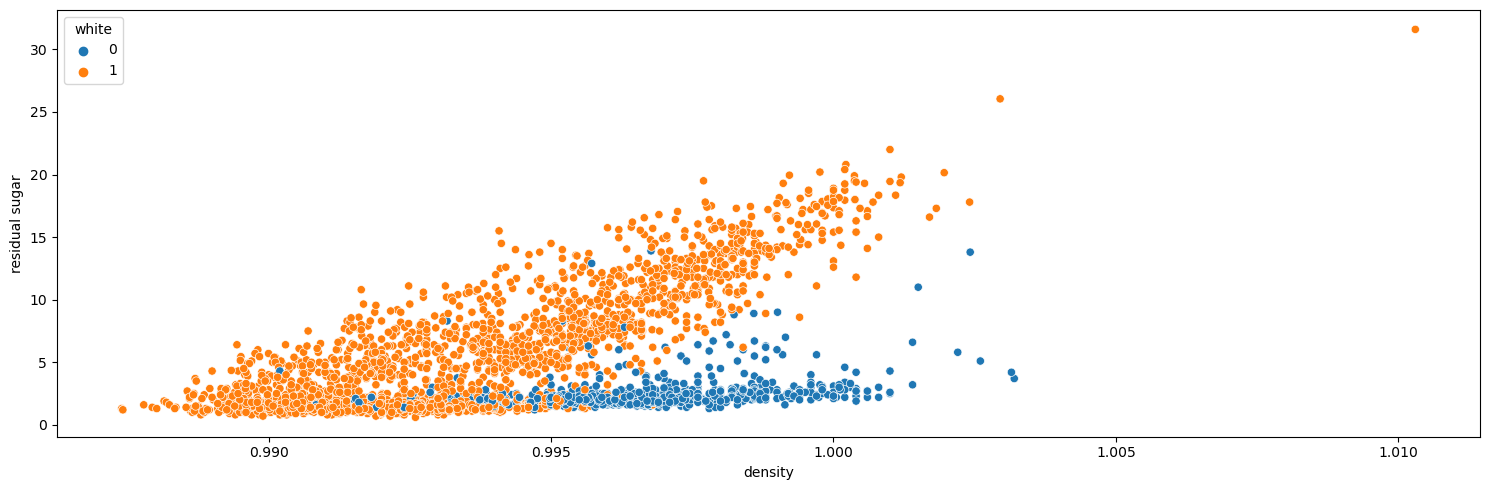

In [6]:
print_den_v_sug()

### Takeaways:

* As the visuals indicates there seems to be a realtionship with white wine
* Wines that had less than 7 in residual sugar and socred over 7 in quality are 466
* Red wines are note as sweet

## * How does alocohol affect density?

density vs alcohol


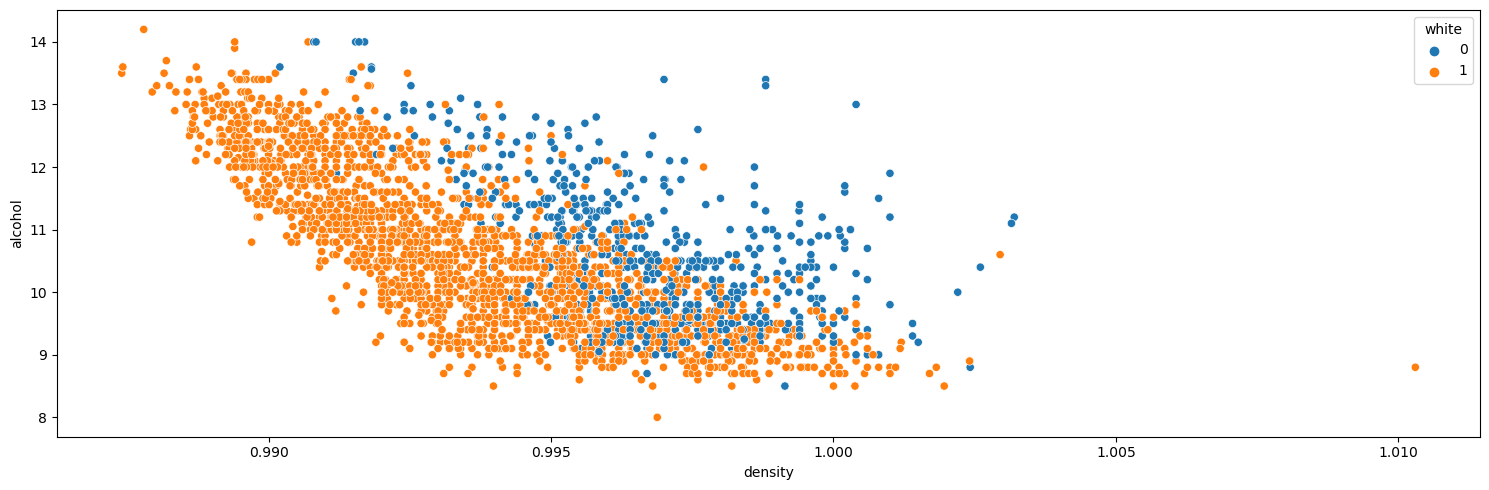

In [7]:
print_den_v_alc()

### Takeaways:
* As the density increases the alcohol content drops
* Wines that had a 12 or more in alcohol and socred over 7 in quality are 237
* Red wines have higher alcohol content at a slighty higher density

# Stats Testing

## Hypothesis:

H 0 : There is no linear correlation between density and alcohol.

H a : There is a linear relationship between density and alcohol.

## Pearson's R-test¶

In [8]:
x = train.density
y = train.alcohol

α = 0.05

corr, p = stats.pearsonr(x, y)
corr, p

(-0.6919140522556472, 0.0)

## P-value less than alpha?

In [9]:
p < α

True

### We can reject the null hypothesis.


## * Is the average pH higher in red or white wine?

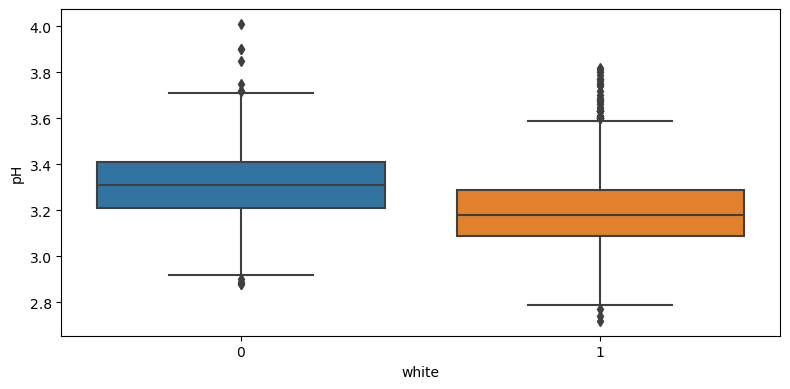

In [10]:
ph_level()

### Takeaways:
* 
* Red wines have a hi
* It is more that all the payment methods combined

# Stats Testing
## Hypothesis:
H
0
: The average pH level in red and white wines is the same.

H
a
: The average pH in is greater in red wines.
## T-test

In [11]:
# getting the valiues for the red wine pH levels and the average mean for the entire data
t, p = stats.ttest_1samp(train[train['white']==0].pH, train.pH.mean())

print(t, p/2, α)


15.192518488804453 7.880094766885079e-46 0.05


In [12]:
bool((1/2 * p < α) and (t > 0))

True

### We can reject the null hypothesis.


## * How do chlorides affect density?

density vs chlorides


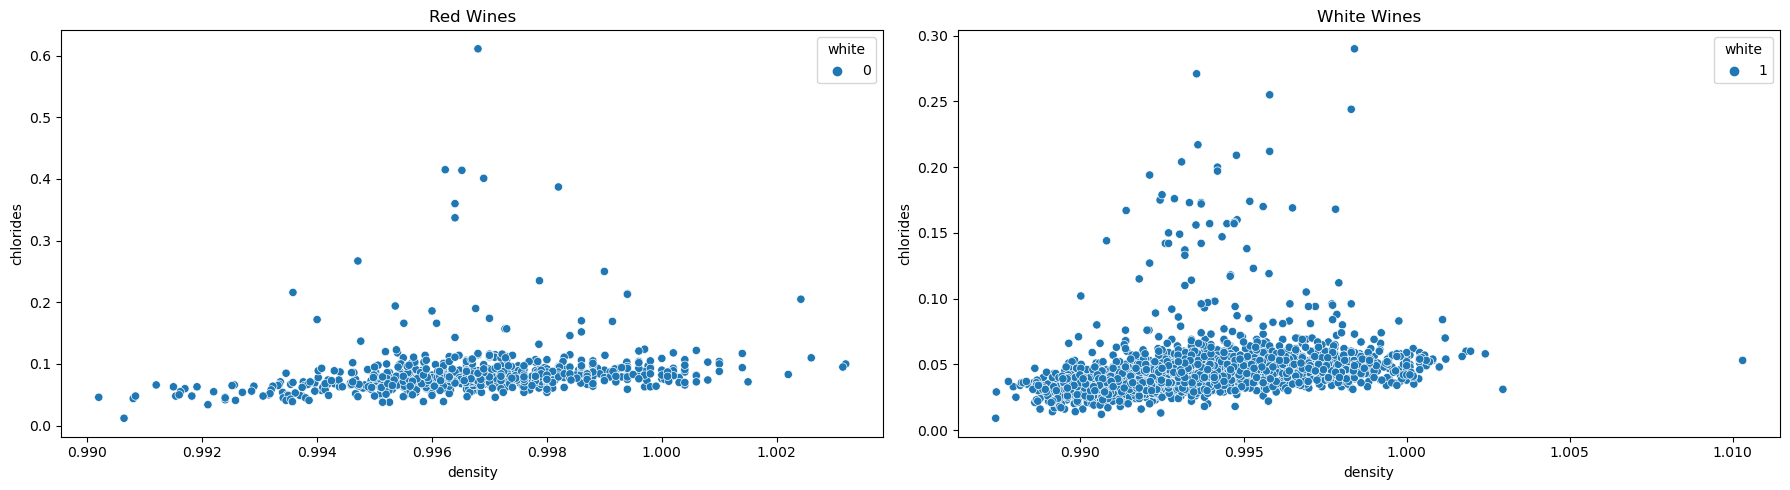

In [13]:
print_den_v_chlo()

### Takeaways
* Chlorides can enhance the perception of acidity in wine. This means that the wine may taste more tangy, crisp, and bright
* As the density measure so does our chlorides
* There are a few outliers that do not follow the trend

# Evaluation Summary:

* Sugar is a driver for quality but 
* "contract_type" was found to be a driver of "churn" due to the high number of customers churning on month to month contracts
* "payment_type" was found to be a driver of "churn" due to the high number of customers churning on with manual payments
* "monthly_charges" was found to be a driver of "churn"
* The median charges for customers who churned \$\ $74.70 while the non churn customers was $64.95

* "internet_service_type" category: DSL was not found to be a driver of "churn"

## Modeling

* Customers who do not churn makeup 73% of the data
* By assuming non-churner a 73% baseline accuracy is achieved
* I will compare how each model runs using various hyperparameters
* I will compare the train with validate data
* I will use accuracy as my evaluation metric
* The best preforming model will be used on my test data

### Prep Data

In [14]:
X_train, y_train, X_validate, y_validate, X_test, y_test = model_prep_data()

NameError: name 'model_prep_data' is not defined

# 2 Feature Clusters

## ANOVA Stat Testing

## (OLS) Linear Regression Model Testing

* sdvgadsgadsvsadbv


# 3 Feature  Clusters

## ANOVA Stat Testing

In [ ]:
model_knn(X_train, X_validate, y_train, y_validate)

## (OLS) Linear Regression Model Testing

* KNN accuracy is 2 points better than baseline


# 4  Feature Clusters

model_random_forest(X_train, X_validate, y_train, y_validate)

## (OLS) Linear Regression Model Testing

* Random Forest accuracy is 3 points better than baseline


# Comparing Summary
* Decision Tree, Random Forest, and KKN models all performed similar to each other
* The KNN model had a slighlty lower accuracy than the three best models but seemed uniform mostly with results.
* The Logistic Regression model preformed poorly. I may need to revisit and see where mistakes may have been made.

* The KNN Model was selected to run the test data. This model also was 2 points better than baseline but seemed to be most stable when charting the resukts.

# KNN Model Testing

In [ ]:
model_knn_test(X_train, X_test, y_train, y_test)


## Modeling Summary

* Decision Tree, Random Forest, and KKN models all performed similar to each other
* The KNN model had a slighlty lower accuracy than the three best models but seemed uniform mostly with results.
* Knn Model preformed slighlty better than baseline

# Conclusion

## Exploration Summary
* Customers with Fiber Optics have more churn than DSL.
* Encouraging customers to be on automatic payment plan will seems to reduce churn.
* 643 manual check writers churned which is a 45% churn rate for all payment types.
* When the monthly charges reached approximate \$70 the churn rate rised.
* The median monthly payment for customers who churns is \$79.70


## Modeling
* The final model failed to significantly outperform the baseline. Possible reasons include:

“payment_type” and “contract_type” may not have had meaningful relation to who will churn.
Since monthly charges" seems to be a larger contributor to churn, adding more of the services to see which service may be contributing to churn. 

## Recommendations
* This may be simple enough but have a column for reason for caneling service. Helpful to pinpoint issues and improve service.

## Next Steps
* Explore the relation of Fiber Optics to churn. Services like tech support or streaming services could also be explored.